
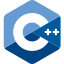
<br>

<div style="text-align:center; font-size:200%;">
 <b>Ausnahmen (Exceptions)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 06 Ausnahmen (Exceptions).ipynb -->
<!-- slides/module_180_error_handling/topic_120_exceptions.cpp -->


## Ausnahmen (Exceptions)

- Wir können Fehler in C++ mit Ausnahmen behandeln
- Das Auslösen einer Ausnahme unterbricht die Ausführung des Programms
- Es wird die Kette von Funktionsaufrufen so weit abgebrochen, bis eine
  Behandlung der Ausnahme erfolgt


## Auslösen einer Ausnahme

- Wir können eine Ausnahme mit dem `throw`-Operator auslösen
- Der `throw`-Operator bekommt ein Ausnahme-Objekt übergeben: `throw ex;`
- Normalerweise
  - ist `ex` Objekt einer Klasse, die von `std::exception` erbt
  - wird `ex` als Wert übergeben (nicht als Referenz)

In [ ]:
#include <stdexcept>

int int_sqrt(int n) {
    for (int m = 0; m <= n; ++m) {
        if (m * m == n) {
            return m;
        }
    }
    throw std::domain_error("not a square number");
}

In [ ]:
int_sqrt(9)

In [ ]:
// int_sqrt(8)


- Nicht behandelte Ausnahmen brechen die Programmausführung ab:

In [ ]:
#include <iostream>

void print_int_sqrt(int n) {
    int root{int_sqrt(n)};
    std::cout << "The root of " << n << " is " << root << ".\n";
}

In [ ]:
print_int_sqrt(9)

In [ ]:
// print_int_sqrt(8)


## Fehlerklassen

- In C++ gibt es einige vordefinierte Fehlerklassen, mit denen verschiedene
  Fehlerarten signalisiert werden können
- Diese Klassen sind in der Header-Datei `<stdexcept>` definiert


| Fehlerklasse            | Oberklasse           | Beschreibung                                        |
| :---------------------- | :------------------- | :-------------------------------------------------- |
| `std::logic_error`      | `std::exception`     | Verletzung von Precondition oder Klasseninvariante  |
| `std::invalid_argument` | `std::logic_error`   | Ungültiges Argument                                 |
| `std::domain_error`     | `std::logic_error`   | Argumente außerhalb des erlauben Bereichs           |
| `std::length_error`     | `std::logic_error`   | Länge überschreitet erlaubtes Maximum               |
| `std::out_of_range`     | `std::logic_error`   | Elementzugriff außerhalb der gültigen Indizes       |
| `std::runtime_error`    | `std::exception`     | Fehler, der erst zur Laufzeit erkannt werden kann   |
| `std::range_error`      | `std::runtime_error` | Ergebnis einer Berechnung nicht vom Typ darstellbar |
| `std::overflow_error`   | `std::runtime_error` | Überlauf bei einer Berechnung                       |
| `std::underflow_error`  | `std::runtime_error` | Unterlauf bei einer Berechnung                      |


## Workshop: Bank Account

Definieren Sie eine Klasse `BankAccount` mit
- einer Member-Variablen `double balance`
- Member-Funktionen
  - `void deposit(double amount)`
  - `void withdraw(double amount)`

*Hinweis: Für eine realistischere Implementierung sollte ein Dezimaltyp statt
`double` verwendet werden.*


Die Klasse soll in folgenden Fällen eine Exception vom Typ `domain_error`
auslösen:

- Wenn ein neuer `BankAccount` mit negativer `balance` angelegt werden soll.
- Wenn `deposit` mit einem negativen Wert aufgerufen wird.
- Wenn `withdraw` mit einem negativen Wert aufgerufen wird oder durch das
  Abheben des Betrags die `balance` des Kontos negativ werden würde.

In [ ]:
#include <stdexcept>

class BankAccount
{
public:
    BankAccount(double balance);

    void deposit(double amount);
    void withdraw(double amount);

    double balance() const;

private:
    double balance_;
}

In [ ]:
BankAccount::BankAccount(double balance)
    : balance_(balance)
{
    if (balance < 0) {
        throw std::domain_error("Cannot create an account with negative balance.");
    }
}

In [ ]:
void BankAccount::deposit(double amount)
{
    if (amount < 0) {
        throw std::domain_error("Cannot deposit a negative amount.");
    }
    balance_ += amount;
}

In [ ]:
void BankAccount::withdraw(double amount)
{
    if (amount < 0) {
        throw std::domain_error("Cannot withdraw a negative amount.");
    }
    if (balance_ - amount < 0) {
        throw std::domain_error("Cannot withdraw more than the balance.");
    }
    balance_ -= amount;
}


Testen Sie die Funktionalität der Klasse sowohl für erfolgreiche
Transaktionen, als auch für Transaktionen, die Exceptions auslösen.

In [ ]:
double BankAccount::balance() const { return balance_; }

In [ ]:
BankAccount b{100.0};
b.balance()

In [ ]:
b.deposit(200.0);
b.balance()

In [ ]:
// b.deposit(-100.0);

In [ ]:
b.withdraw(50.0);
b.balance()

In [ ]:
// b.withdraw(-200.0);

In [ ]:
// b.withdraw(1000.0);